# CNN 심화

## [예제1] 3 Conv CIFAR10 Classification

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Load CIFAR10 Data

In [2]:
from tensorflow.keras.datasets import cifar10
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

train_data = train_data.astype(np.double)
train_data = train_data / 255.0

test_data = test_data.astype(np.double)
test_data = test_data / 255.0

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


> ### Import Keras Layers

In [3]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

> ### Create Model (기본 모델)

In [4]:
model = tf.keras.models.Sequential()

model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

model_B = model
model_B.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

> ### Create Model (기본 모델에 Dropout 추가)

In [5]:
model = tf.keras.models.Sequential()

model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

model_DO = model
model_DO.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)        

> ### Create Model (기본 모델에 Batch normalization 추가)

In [6]:
model = tf.keras.models.Sequential()

model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

model_BN = model
model_BN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)        

> ### Compile Model

In [7]:
model_B.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model_DO.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model_BN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

> ### Training

In [10]:
%%time
history_B = model_B.fit(train_data, train_labels, shuffle=True,
                batch_size=500, epochs=30,
                validation_data=(test_data, test_labels))

Epoch 1/30
100/100 [==============================] - 4s 37ms/step - loss: 1.6548 - accuracy: 0.3950 - val_loss: 1.3126 - val_accuracy: 0.5167
Epoch 2/30
100/100 [==============================] - 3s 35ms/step - loss: 1.1833 - accuracy: 0.5808 - val_loss: 1.0423 - val_accuracy: 0.6363
Epoch 3/30
100/100 [==============================] - 3s 35ms/step - loss: 0.9729 - accuracy: 0.6618 - val_loss: 0.9207 - val_accuracy: 0.6772
Epoch 4/30
100/100 [==============================] - 3s 35ms/step - loss: 0.8388 - accuracy: 0.7071 - val_loss: 0.8786 - val_accuracy: 0.6972
Epoch 5/30
100/100 [==============================] - 4s 35ms/step - loss: 0.7414 - accuracy: 0.7411 - val_loss: 0.8005 - val_accuracy: 0.7197
Epoch 6/30
100/100 [==============================] - 4s 35ms/step - loss: 0.6575 - accuracy: 0.7726 - val_loss: 0.7600 - val_accuracy: 0.7376
Epoch 7/30
100/100 [==============================] - 4s 35ms/step - loss: 0.5750 - accuracy: 0.8014 - val_loss: 0.7388 - val_accuracy: 0.7499

In [11]:
%%time
history_DO = model_DO.fit(train_data, train_labels, shuffle=True,
                batch_size=500, epochs=30,
                validation_data=(test_data, test_labels))

Epoch 1/30
100/100 [==============================] - 5s 54ms/step - loss: 1.6984 - accuracy: 0.3800 - val_loss: 1.4913 - val_accuracy: 0.4990
Epoch 2/30
100/100 [==============================] - 5s 52ms/step - loss: 1.2119 - accuracy: 0.5690 - val_loss: 1.2236 - val_accuracy: 0.5944
Epoch 3/30
100/100 [==============================] - 5s 52ms/step - loss: 1.0004 - accuracy: 0.6490 - val_loss: 1.0916 - val_accuracy: 0.6592
Epoch 4/30
100/100 [==============================] - 5s 53ms/step - loss: 0.8776 - accuracy: 0.6946 - val_loss: 0.9232 - val_accuracy: 0.7080
Epoch 5/30
100/100 [==============================] - 5s 53ms/step - loss: 0.7736 - accuracy: 0.7289 - val_loss: 0.9042 - val_accuracy: 0.6992
Epoch 6/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6858 - accuracy: 0.7597 - val_loss: 0.8112 - val_accuracy: 0.7398
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6201 - accuracy: 0.7821 - val_loss: 0.7716 - val_accuracy: 0.7484

In [12]:
%%time
history_BN = model_BN.fit(train_data, train_labels, shuffle=True,
                batch_size=500, epochs=30,
                validation_data=(test_data, test_labels))

Epoch 1/30
100/100 [==============================] - 5s 46ms/step - loss: 2.3135 - accuracy: 0.4451 - val_loss: 3.1699 - val_accuracy: 0.1258
Epoch 2/30
100/100 [==============================] - 4s 43ms/step - loss: 1.0410 - accuracy: 0.6324 - val_loss: 3.1864 - val_accuracy: 0.1524
Epoch 3/30
100/100 [==============================] - 4s 44ms/step - loss: 0.7895 - accuracy: 0.7228 - val_loss: 3.5181 - val_accuracy: 0.2030
Epoch 4/30
100/100 [==============================] - 4s 43ms/step - loss: 0.6015 - accuracy: 0.7915 - val_loss: 2.5650 - val_accuracy: 0.3146
Epoch 5/30
100/100 [==============================] - 4s 43ms/step - loss: 0.4386 - accuracy: 0.8483 - val_loss: 2.0168 - val_accuracy: 0.4461
Epoch 6/30
100/100 [==============================] - 4s 43ms/step - loss: 0.2844 - accuracy: 0.9063 - val_loss: 1.0455 - val_accuracy: 0.6817
Epoch 7/30
100/100 [==============================] - 4s 43ms/step - loss: 0.1611 - accuracy: 0.9509 - val_loss: 0.8777 - val_accuracy: 0.7350

> ### Ploting

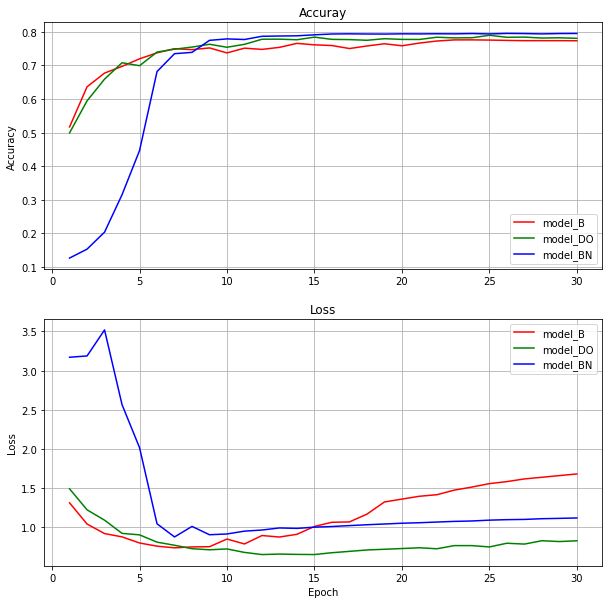

In [13]:
loss = history_B.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history_B.history['val_accuracy'], 'r', label='model_B')
plt.plot(epochs, history_DO.history['val_accuracy'], 'g', label='model_DO')
plt.plot(epochs, history_BN.history['val_accuracy'], 'b', label='model_BN')
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history_B.history['val_loss'], 'r', label='model_B')
plt.plot(epochs, history_DO.history['val_loss'], 'g', label='model_DO')
plt.plot(epochs, history_BN.history['val_loss'], 'b', label='model_BN')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### 결과 출력을 위한 함수

In [14]:
def Make_Result_Plot(suptitle, data, label, y_max):
    fig_result, ax_result = plt.subplots(2, 5, figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx],cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### 학습 후 상황

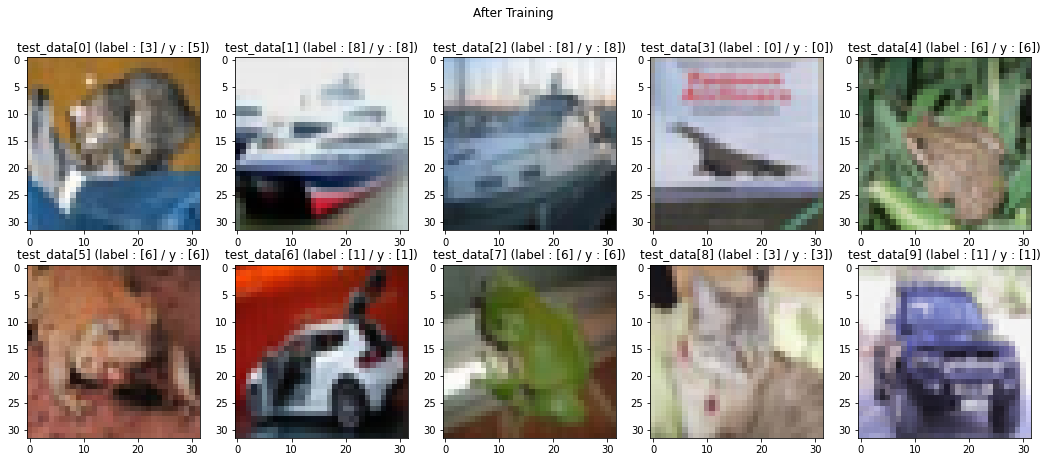

In [15]:
y_out = model_BN.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)

> ### ImageDataGenerator (Data Augmentation)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
    horizontal_flip=True,   # 좌우 반전 여부 설정
    width_shift_range=0.1,  # 좌우로 이동할 범위 설정
    height_shift_range=0.1  # 상하로 이동할 범위 설정
    )

In [17]:
train_data_gen = image_gen.flow(train_data, train_labels, batch_size=500)

In [18]:
train_data_sample, train_labels_sample = next(train_data_gen)
print(train_data_sample.shape, train_labels_sample.shape)

(500, 32, 32, 3) (500, 1)


> ### Training (Data Augmentation)

In [19]:
history_DA = model_BN.fit(train_data_gen,
                steps_per_epoch = len(train_data)/500,
                epochs=30,
                validation_data=(test_data, test_labels))

Epoch 1/30
100/100 [==============================] - 20s 198ms/step - loss: 1.1386 - accuracy: 0.6251 - val_loss: 1.3001 - val_accuracy: 0.5977
Epoch 2/30
100/100 [==============================] - 19s 195ms/step - loss: 0.7776 - accuracy: 0.7249 - val_loss: 1.7375 - val_accuracy: 0.5144
Epoch 3/30
100/100 [==============================] - 20s 196ms/step - loss: 0.6643 - accuracy: 0.7684 - val_loss: 0.7996 - val_accuracy: 0.7267
Epoch 4/30
100/100 [==============================] - 20s 196ms/step - loss: 0.5850 - accuracy: 0.7955 - val_loss: 0.7090 - val_accuracy: 0.7624
Epoch 5/30
100/100 [==============================] - 20s 195ms/step - loss: 0.5294 - accuracy: 0.8150 - val_loss: 0.7533 - val_accuracy: 0.7580
Epoch 6/30
100/100 [==============================] - 19s 194ms/step - loss: 0.4816 - accuracy: 0.8316 - val_loss: 0.7100 - val_accuracy: 0.7764
Epoch 7/30
100/100 [==============================] - 19s 194ms/step - loss: 0.4413 - accuracy: 0.8459 - val_loss: 0.7794 - val_ac

> ### Ploting (Data Augmentation)

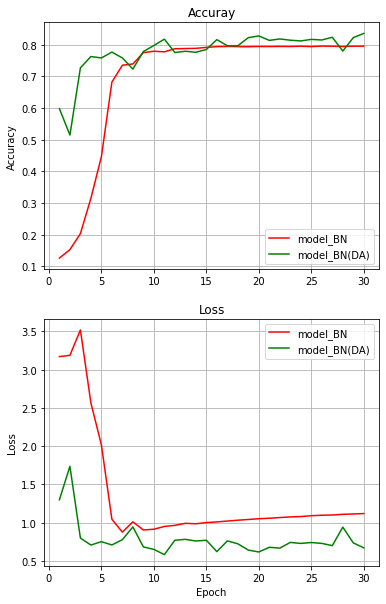

In [20]:
loss = history_DA.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history_BN.history['val_accuracy'], 'r', label='model_BN')
plt.plot(epochs, history_DA.history['val_accuracy'], 'g', label='model_BN(DA)')
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history_BN.history['val_loss'], 'r', label='model_BN')
plt.plot(epochs, history_DA.history['val_loss'], 'g', label='model_BN(DA)')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### 학습 후 상황 (Data Augmentation)

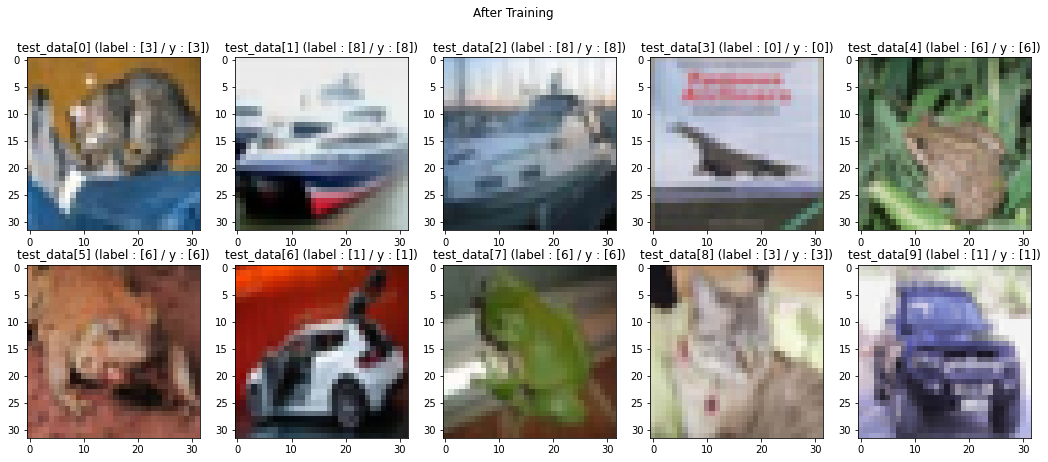

In [21]:
y_out = model_BN.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)